In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style("darkgrid")
sns.set_palette("pastel")

In [3]:
high_certainty_path = 'data/sdss-galaxyzoo/high_certainty/merged_dataset.csv'
full_over_lap_path = 'data/sdss-galaxyzoo/des_overlap/merged_dataset.csv'

In [4]:
high_certainty_df = pd.read_csv( high_certainty_path )
full_overlap_df = pd.read_csv( full_over_lap_path )

# High confidence Overlap 

### 1. Intersection b/w 'high confidence' &  'full overlap'

In [16]:
intersection = pd.merge(high_certainty_df, full_overlap_df, how='inner')

In [17]:
len(intersection)

1150

In [18]:
intersection.columns

Index(['OBJID', 'RA', 'DEC', 'NVOTE', 'P_EL', 'P_CW', 'P_ACW', 'P_EDGE',
       'P_DK', 'P_MG', 'P_CS', 'P_EL_DEBIASED', 'P_CS_DEBIASED', 'SPIRAL',
       'ELLIPTICAL', 'UNCERTAIN', 'RA_deg', 'DEC_deg', 'ra', 'dec', 'u', 'g',
       'r', 'i', 'z', 'run', 'rerun', 'camcol', 'field', 'petroRad_r'],
      dtype='object')

In [19]:
spirals = intersection[ intersection.P_CS_DEBIASED > intersection.P_EL_DEBIASED ]
ellipticals = intersection[ intersection.P_CS_DEBIASED < intersection.P_EL_DEBIASED ]

In [20]:
spirals.shape, ellipticals.shape

((562, 30), (588, 30))

Text(0.5, 1.0, 'Prob dist for each type in the "intersection" dataset')

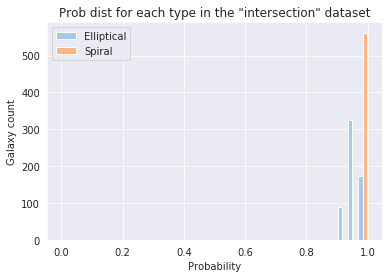

In [22]:
plt.hist([ellipticals.P_EL_DEBIASED, spirals.P_CS_DEBIASED], bins=30, range=(0, 1), label=['Elliptical', 'Spiral'])
plt.legend()
plt.xlabel('Probability')
plt.ylabel('Galaxy count')
plt.title('Prob dist for each type in the "intersection" dataset')

/home/khan74/.conda/envs/myanaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Violin plot for spirals in "intersection" dataset')

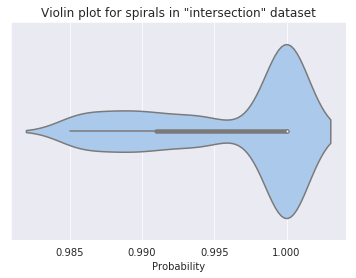

In [23]:
sns.violinplot(spirals.P_CS_DEBIASED)
plt.xlabel('Probability')
plt.title('Violin plot for spirals in "intersection" dataset')

Text(0.5, 1.0, 'Violin plot for elliptical in "intersection" dataset')

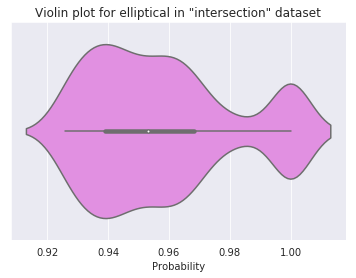

In [24]:
sns.violinplot(ellipticals.P_EL_DEBIASED, color='violet')
plt.xlabel('Probability')
plt.title('Violin plot for elliptical in "intersection" dataset')

Text(0.5, 1.0, 'RA distribution for "intersection" dataset')

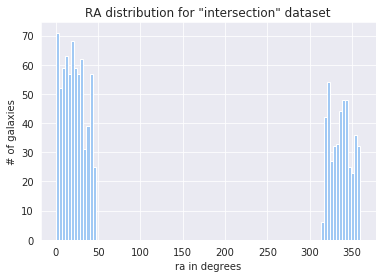

In [27]:
intersection.ra.hist(bins=100)
plt.xlabel('ra in degrees')
plt.ylabel('# of galaxies')
plt.title('RA distribution for "intersection" dataset')

Text(0.5, 1.0, 'DEC distribution for "intersection" dataset')

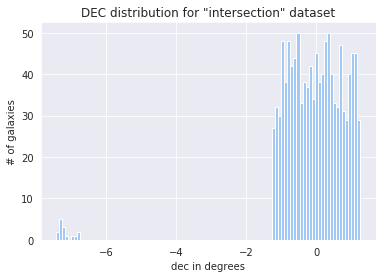

In [28]:
intersection.dec.hist(bins=100)
plt.xlabel('dec in degrees')
plt.ylabel('# of galaxies')
plt.title('DEC distribution for "intersection" dataset')

Text(0, 0.5, 'dec')

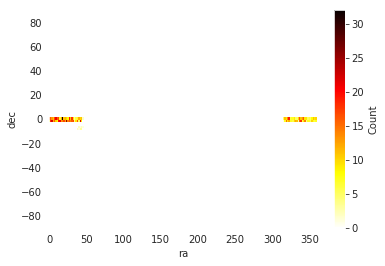

In [25]:
plt.hist2d(intersection['ra'], intersection['dec'], bins=[200, 100], range=[[0, 360], [-90, 90]], cmap='hot_r')
plt.colorbar(label='Count')
plt.xlabel('ra')
plt.ylabel('dec')

/home/khan74/.conda/envs/myanaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'KDE plot for coverage of the "intersection"')

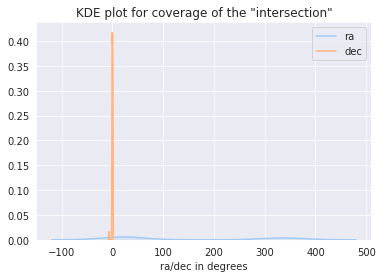

In [26]:
sns.kdeplot(intersection.ra, shade=True, label='ra')
sns.kdeplot(intersection.dec, shade=True, label='dec')
plt.xlabel('ra/dec in degrees')
plt.title('KDE plot for coverage of the "intersection"')

### 2. Astropy Crossmatch 